In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings("ignore")
from fbprophet import Prophet
from datetime import datetime

In [3]:
pinkwink_web = pd.read_csv('./data/PinkWink Web Traffic.csv', 
                            encoding='utf-8', thousands=',',
                            names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


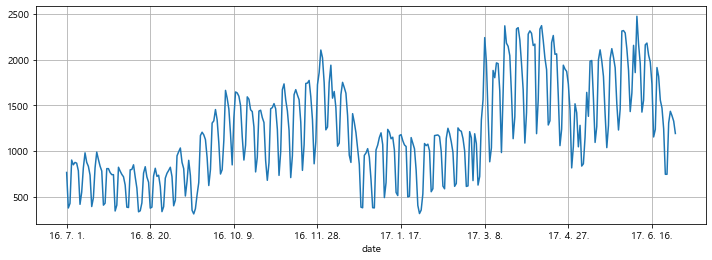

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)
plt.show()

In [5]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [7]:
def mse(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [10]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

for i in [f1,f2,f3,f15]:
    print(mse(i,time,traffic))    

430.8597308110963
430.6284101894695
429.53280466762925
330.4777306313198


In [11]:
for n in range(1, 31):
    fnp = np.polyfit(time, traffic, n)
    fn = np.poly1d(fnp)
    print(f'{n}차: {mse(fn, time, traffic)}')

1차: 430.8597308110963
2차: 430.6284101894695
3차: 429.53280466762925
4차: 423.5828148341961
5차: 389.848361202182
6차: 385.4059194064313
7차: 376.08375272436695
8차: 361.83792091114464
9차: 347.7570709151161
10차: 346.331335808412
11차: 341.38530814224
12차: 332.44007721732567
13차: 330.7222438171503
14차: 330.5615447318698
15차: 330.4777306313198
16차: 327.587951336344
17차: 327.06486962499304
18차: 327.25505367018064
19차: 321.80864183364145
20차: 321.8475279786277
21차: 321.66473995908507
22차: 321.3585738988133
23차: 321.0354870245332
24차: 320.6583826921816
25차: 320.7840292561984
26차: 320.79830166615426
27차: 320.7521560763263
28차: 320.56721663516083
29차: 320.7210561281949
30차: 320.7088383933583


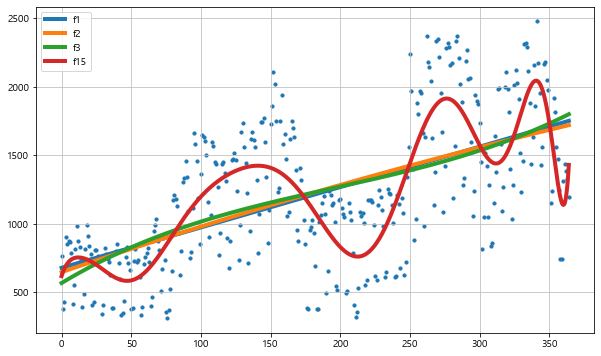

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

In [14]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [15]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,680.543107,1108.158172
421,2017-08-26,481.544412,273.816453,690.659256
422,2017-08-27,614.212001,414.278562,820.333269
423,2017-08-28,1166.966207,939.301753,1367.640610
424,2017-08-29,1203.000155,989.258704,1405.483966


In [20]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-01,825.908758,535.546893,951.652053,825.908758,825.908758,-89.203321,-89.203321,-89.203321,241.465995,...,-51.503692,-51.503692,-51.503692,-279.165624,-279.165624,-279.165624,0.0,0.0,0.0,736.705437
1,2016-07-02,826.717037,96.065597,507.119315,826.717037,826.717037,-521.745203,-521.745203,-521.745203,241.465995,...,-467.504111,-467.504111,-467.504111,-295.707087,-295.707087,-295.707087,0.0,0.0,0.0,304.971834
2,2016-07-03,827.525316,224.462751,639.423718,827.525316,827.525316,-403.033522,-403.033522,-403.033522,241.465995,...,-335.342351,-335.342351,-335.342351,-309.157166,-309.157166,-309.157166,0.0,0.0,0.0,424.491793
3,2016-07-04,828.333595,755.197787,1182.232522,828.333595,828.333595,139.019272,139.019272,139.019272,241.465995,...,217.283657,217.283657,217.283657,-319.730380,-319.730380,-319.730380,0.0,0.0,0.0,967.352866
4,2016-07-05,829.141874,782.439081,1216.785619,829.141874,829.141874,167.238924,167.238924,167.238924,241.465995,...,253.456750,253.456750,253.456750,-327.683821,-327.683821,-327.683821,0.0,0.0,0.0,996.380798


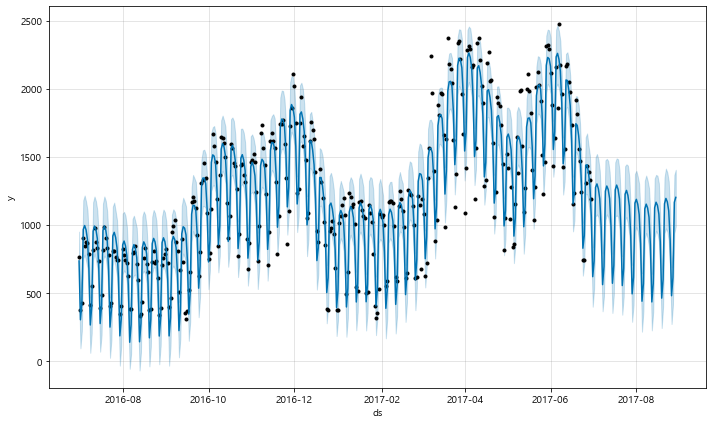

In [18]:
m.plot(forecast);

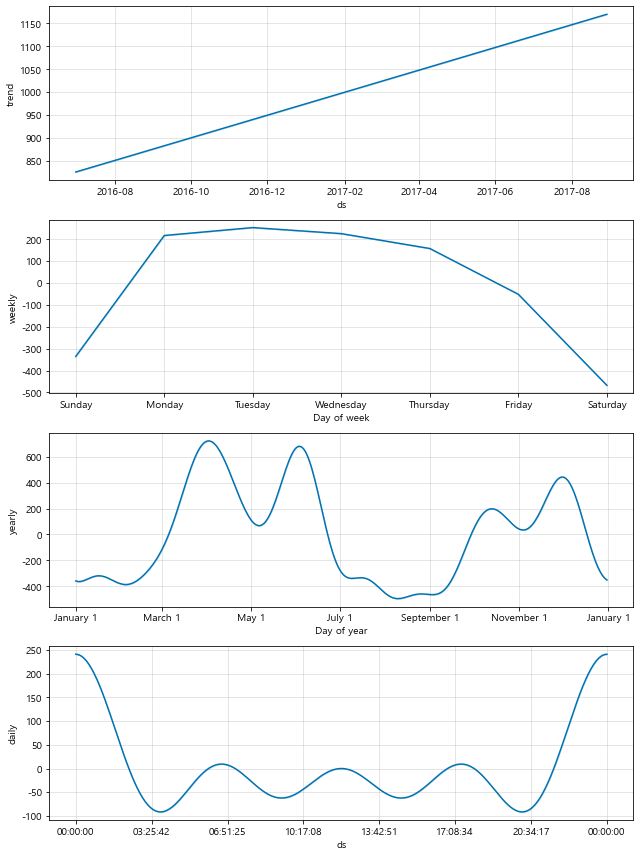

In [19]:
m.plot_components(forecast);